<a href="https://www.kaggle.com/code/aneevinay/bank-term-deposit-prediction?scriptVersionId=255603265" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv


# Introduction

This notebook presents a binary classification analysis on the Bank Marketing Dataset, aiming to predict whether a client will subscribe to a term deposit (yes or no).

The dataset contains customer information related to marketing campaigns by a banking institution. It includes both numerical and categorical features such as age, job, education, contact method, and past campaign outcomes.

This is a combination notebook where I perform:

* Data Cleaning & Preprocessing

* Exploratory Data Analysis (EDA)

* Feature Engineering

* Model Building using classification algorithms

* Performance Evaluation

The primary goal is to build a model that helps the bank efficiently target potential clients for term deposit offers using historical data.

# Load Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Read the Data

In [3]:
df=pd.read_csv('/kaggle/input/playground-series-s5e8/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s5e8/test.csv')

# Check the Data

In [4]:
df.shape

(750000, 18)

## Glimpse the Data

In [5]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [6]:
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


## Check Missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [8]:
df.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There is no missing values

## Data Unbalance

In [9]:
df['y'].value_counts()

y
0    659512
1     90488
Name: count, dtype: int64

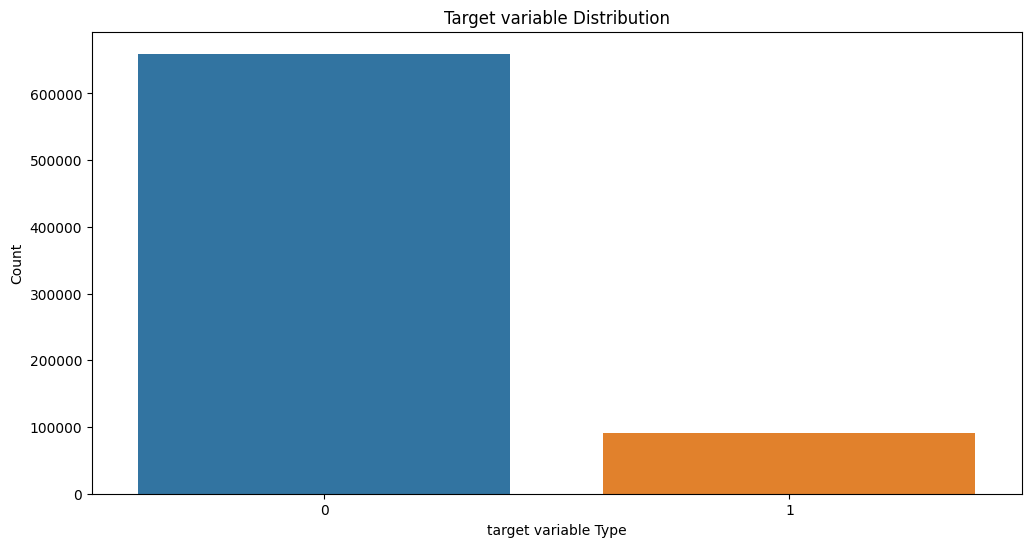

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='y', data=df)
plt.title('Target variable Distribution')
plt.xlabel('target variable Type')
plt.ylabel('Count')
plt.show()
plt.savefig('Target variable distribution.png')

There is a significant class imbalance

# Data Exploration

## Explore Categorical Features


job value counts:
job
management       175541
blue-collar      170498
technician       138107
admin.            81492
services          64209
retired           35185
self-employed     19020
entrepreneur      17718
unemployed        17634
housemaid         15912
student           11767
unknown            2917
Name: count, dtype: int64


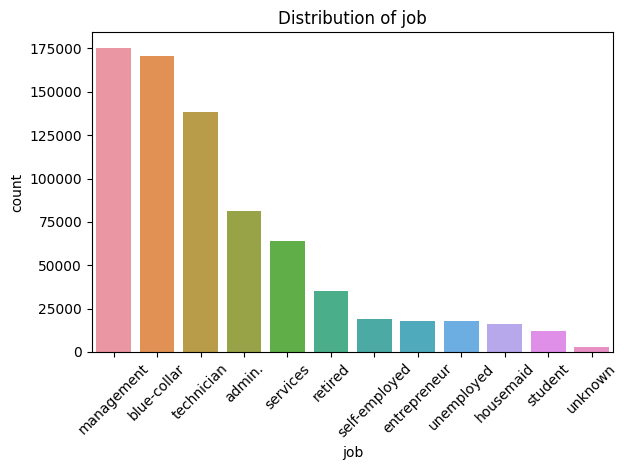


marital value counts:
marital
married     480759
single      194834
divorced     74407
Name: count, dtype: int64


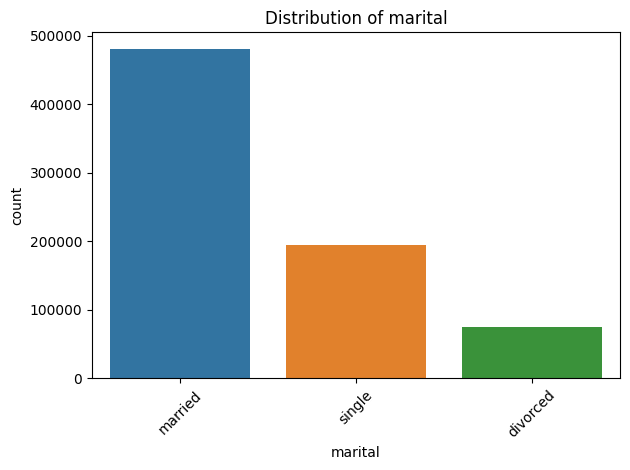


education value counts:
education
secondary    401683
tertiary     227508
primary       99510
unknown       21299
Name: count, dtype: int64


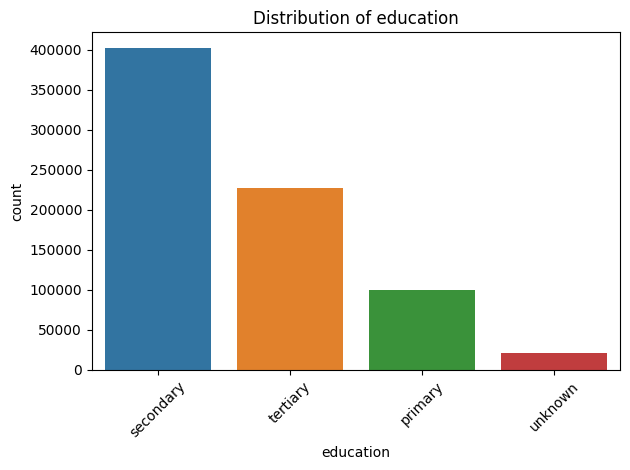


default value counts:
default
no     737151
yes     12849
Name: count, dtype: int64


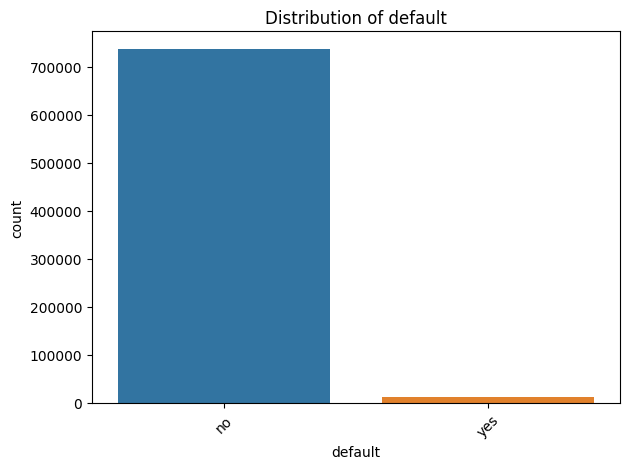


housing value counts:
housing
yes    411288
no     338712
Name: count, dtype: int64


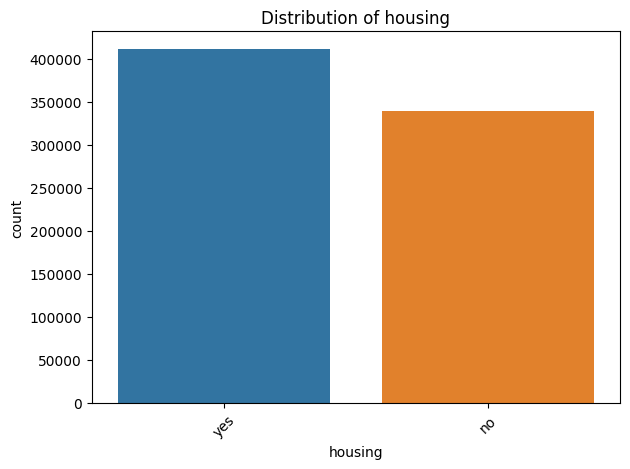


loan value counts:
loan
no     645023
yes    104977
Name: count, dtype: int64


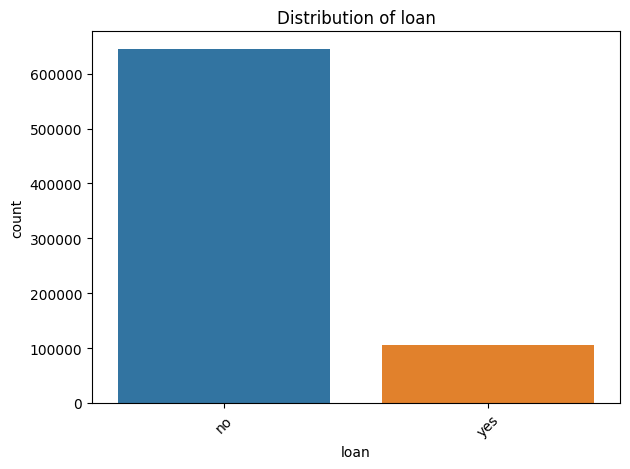


contact value counts:
contact
cellular     486655
unknown      231627
telephone     31718
Name: count, dtype: int64


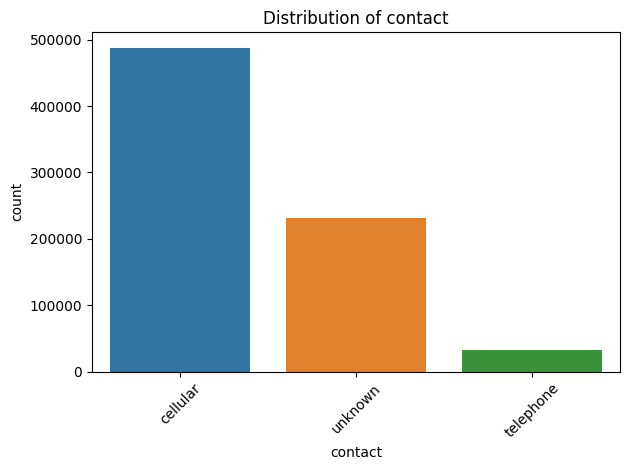


month value counts:
month
may    228411
aug    128859
jul    110647
jun     93670
nov     66062
apr     41319
feb     37611
jan     18937
oct      9204
sep      7409
mar      5802
dec      2069
Name: count, dtype: int64


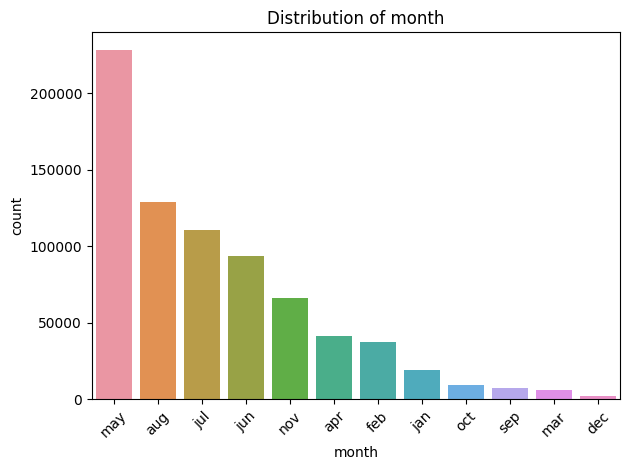


poutcome value counts:
poutcome
unknown    672450
failure     45115
success     17691
other       14744
Name: count, dtype: int64


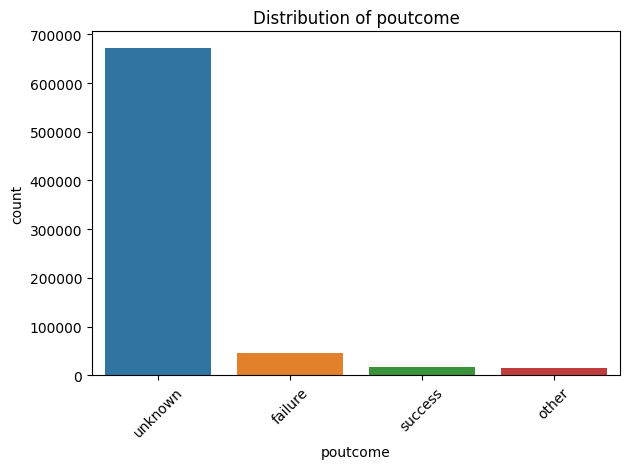

In [11]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Correlation (for numeric variables)

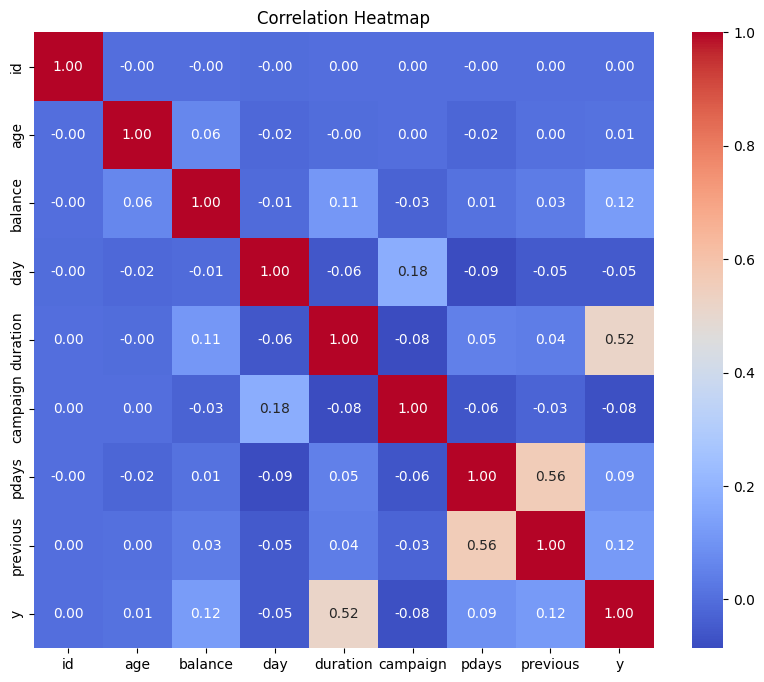

In [12]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Predictive Models

## Define predictors and target values

id and Duration are dropping as a preprocessing. Duration have high correlation with outcome but its not sure thing.so for a predictive model i think it to drop

In [13]:
ids = df['id']

X = df.drop(columns=['y', 'id'])
y = df['y']

## pipeline preprocessing

In [14]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include='object').columns


In [15]:
num_pipeline = Pipeline([
    ('scaler',StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num',num_pipeline, num_cols),
    ('cat',cat_pipeline, cat_cols)
])

## Split data in train, test and validation set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state = 10)

## Random forest classifier

In [17]:
model_pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier())
])

In [18]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('model', RandomForestClassifier())])

In [19]:
y_pred = model_pipeline.predict(X_test)
accuracy_score(y_test,y_pred)

0.9330133333333334

# Submission

In [20]:
test_ids = test['id']

X_final_test = test.drop(columns=['id'])

y_preds = model_pipeline.predict(X_final_test)

submission = pd.DataFrame({
    'id': test_ids,
    'y': y_preds
})

submission.to_csv('submission.csv', index=False)